In [92]:
import requests
import json

with open('./_auth/spotify.json') as f:
    config = json.load(f)
    
AUTH_URL = 'https://accounts.spotify.com/api/token'
BASE_URL = 'https://api.spotify.com/v1'
auth_response = requests.post(AUTH_URL, {'grant_type': 'client_credentials',
        'client_id': config['public_key'],
        'client_secret': config['secret_key']})

d = auth_response.json()
token = d['access_token']

headers = {'Authorization' : f'Bearer {token}'}

song_uri = '2RPbEp0DyBVlkRvvYKopO7'
response = requests.get(BASE_URL + '/audio-features/' + song_uri, headers=headers).json()

In [11]:
response

{'danceability': 0.706,
 'energy': 0.688,
 'key': 1,
 'loudness': -6.357,
 'mode': 1,
 'speechiness': 0.269,
 'acousticness': 0.151,
 'instrumentalness': 0,
 'liveness': 0.466,
 'valence': 0.313,
 'tempo': 125.966,
 'type': 'audio_features',
 'id': '2RPbEp0DyBVlkRvvYKopO7',
 'uri': 'spotify:track:2RPbEp0DyBVlkRvvYKopO7',
 'track_href': 'https://api.spotify.com/v1/tracks/2RPbEp0DyBVlkRvvYKopO7',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2RPbEp0DyBVlkRvvYKopO7',
 'duration_ms': 330783,
 'time_signature': 4}

In [13]:
audio_analyzer = requests.get('https://api.spotify.com/v1/audio-analysis/2RPbEp0DyBVlkRvvYKopO7', headers=headers).json()

In [14]:
audio_analyzer.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

(array([  2.,   3.,   6.,   6.,  40.,  98., 205., 164.,  77.,  37.,  12.,
         13.,   4.,   9.,   0.,   2.,   7.,   2.,   3.,   3.]),
 array([0.45746 , 0.460151, 0.462842, 0.465533, 0.468224, 0.470915,
        0.473606, 0.476297, 0.478988, 0.481679, 0.48437 , 0.487061,
        0.489752, 0.492443, 0.495134, 0.497825, 0.500516, 0.503207,
        0.505898, 0.508589, 0.51128 ]),
 <BarContainer object of 20 artists>)

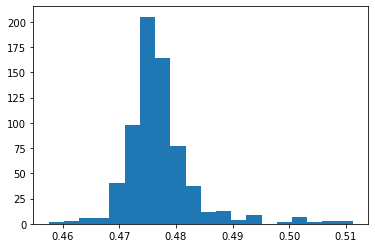

In [25]:
import matplotlib.pyplot as plt
durs = []
for b in audio_analyzer['beats']:
    durs.append(b['duration'])
    
plt.hist(durs, bins=20)


{
    "meta": {
        "analyzer_version": string,
        "platform": string,
        "detailed_status": string,
        "status_code": 42,
        "timestamp": 42,
        "analysis_time": 3.1415,
        "input_process": string
    },
    "track": {
        "num_samples": 42,
        "duration": 3.1415,
        "sample_md5": string,
        "offset_seconds": 42,
        "window_seconds": 42,
        "analysis_sample_rate": 42,
        "analysis_channels": 42,
        "end_of_fade_in": 3.1415,
        "start_of_fade_out": 3.1415,
        "loudness": 3.1415,
        "tempo": 3.1415,
        "tempo_confidence": 3.1415,
        "time_signature": 42,
        "time_signature_confidence": 3.1415,
        "key": 42,
        "key_confidence": 3.1415,
        "mode": 42,
        "mode_confidence": 3.1415,
        "codestring": string,
        "code_version": 3.1415,
        "echoprintstring": string,
        "echoprint_version": 3.1415,
        "synchstring": string,
        "synch_version":